# Credits

I used code from:

1) Introduction to CNN Keras (https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)

2) MNIST: Simple CNN keras (https://www.kaggle.com/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1)

3) MNIST with Keras for Beginners (https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457)

4) Welcome to deep learning (https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99)

# Table of Content

1. Import Libraries
2. Import Data
3. Prep and Clean Data
4. Build the Model
5. Model Validation

# 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Lambda, Dropout, Flatten, Convolution2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler


Using TensorFlow backend.


# 2. Import Data

In [2]:
#Read files
train = pd.read_csv('C:/Users/HP/Desktop/Summer 2019/DNSC 6290 - Machine Learning/Digit/train.csv')
test = pd.read_csv('C:/Users/HP/Desktop/Summer 2019/DNSC 6290 - Machine Learning/Digit/test.csv')

In [3]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Prep and Clean Data

3.1 Missing Data

In [5]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

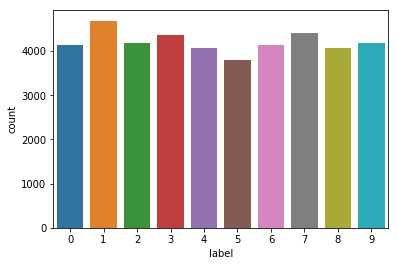

In [7]:
sns.countplot(train['label'])

In [8]:
# Pixel values
X_train = (train.iloc[:,1:].values).astype('float32') 
# Labels
y_train = train.iloc[:,0].values.astype('int32') 
X_test = test.values.astype('float32')

In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

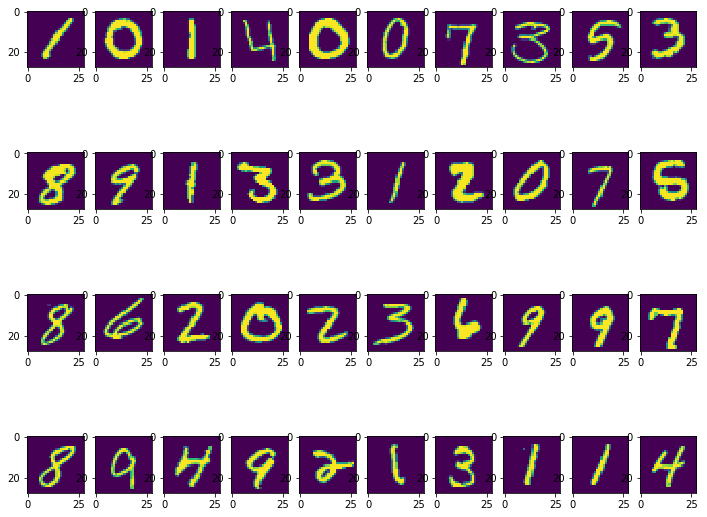

In [11]:
# View the images
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [12]:
#Convert datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_train.shape

(42000, 28, 28, 1)

In [14]:
# Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [15]:
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

C:\Users\HP\Desktop\Python\Anaconda\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


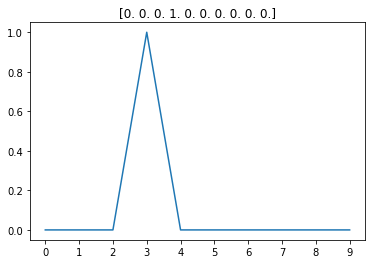

In [16]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

# 4. Build the Model

In [17]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [18]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28, 28 ,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

W0626 14:35:26.482957 24952 deprecation_wrapper.py:119] From C:\Users\HP\Desktop\Python\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 14:35:26.499395 24952 deprecation_wrapper.py:119] From C:\Users\HP\Desktop\Python\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 14:35:26.517360 24952 deprecation_wrapper.py:119] From C:\Users\HP\Desktop\Python\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [19]:
model.compile(optimizer = RMSprop(lr = 0.001),
 loss = 'categorical_crossentropy',
 metrics = ['accuracy'])

W0626 14:35:26.553039 24952 deprecation_wrapper.py:119] From C:\Users\HP\Desktop\Python\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0626 14:35:26.562016 24952 deprecation_wrapper.py:119] From C:\Users\HP\Desktop\Python\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [21]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [22]:
# Cross Validation
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

W0626 14:35:26.976808 24952 deprecation.py:323] From C:\Users\HP\Desktop\Python\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0626 14:35:27.019707 24952 deprecation_wrapper.py:119] From C:\Users\HP\Desktop\Python\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/3
37800/37800 [==============================] - 86s 2ms/step - loss: 0.2400 - acc: 0.9342 - val_loss: 0.3307 - val_acc: 0.9112
Epoch 2/3
37800/37800 [==============================] - 160s 4ms/step - loss: 0.2157 - acc: 0.9417 - val_loss: 0.3473 - val_acc: 0.9126
Epoch 3/3
37800/37800 [==============================] - 149s 4ms/step - loss: 0.2098 - acc: 0.9437 - val_loss: 0.3754 - val_acc: 0.9081


In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [24]:
# Use CNN as it is very efficient for images
def cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [25]:
model= cnn_model()
model.optimizer.lr = 0.01

W0626 14:42:01.978295 24952 deprecation_wrapper.py:119] From C:\Users\HP\Desktop\Python\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [26]:
history = model.fit_generator(generator = batches, steps_per_epoch = batches.n, epochs = 1, 
                    validation_data = val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 3949s 104ms/step - loss: 0.0797 - acc: 0.9788 - val_loss: 0.1286 - val_acc: 0.9740


In [27]:
# Add Batch Normalization
from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [28]:
model= get_bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 3515s 93ms/step - loss: 0.0226 - acc: 0.9947 - val_loss: 0.0858 - val_acc: 0.9928


Note: Should have tried other numbers of layers, however GPU was overheating.

# 5. Model Validation

In [30]:
final_loss, final_acc = model.evaluate(X_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0857, final accuracy: 0.9929


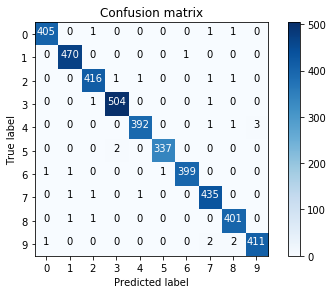

In [32]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [33]:
predictions = model.predict_classes(X_test, verbose=0)

In [34]:
solution = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
solution.to_csv('C:/Users/HP/Desktop/Summer 2019/DNSC 6290 - Machine Learning/Digit/S2.csv', index=False, header=True)